##### Imports

In [1]:
import os
import pandas as pd
import csv

import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

from temp_funcs import path, csv_path, path_jem, \
read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

In [2]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.5)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

In [3]:
fields_morph = ["name", "id", "specimen_id",
                "vrest", "ri", "sag", "tau", "upstroke_downstroke_ratio_long_square", 
                "latency", "f_i_curve_slope"]
path_morph = os.path.join(csv_path, "ephys_mIVSCC_MET.csv")
morph = read_file(path_morph, fields_morph)
morph = drop_nans(morph, ["specimen_id"])

INFO:temp_funcs:Read file in as a pandas dataframe
INFO:temp_funcs:Dropped NaNs from these columns: ['specimen_id']


In [4]:
path_list = os.path.join(csv_path, "short_tall_morph.csv")
morph_list = read_file(path_list)

INFO:temp_funcs:Read file in as a pandas dataframe


In [5]:
morph_list = read_file(path_list)

INFO:temp_funcs:Read file in as a pandas dataframe


In [6]:
morph_list["Morpho type"].unique()

array(['Short', 'Tall'], dtype=object)

In [7]:
morph_list["Projection Class"].unique()

array(['IT', 'CT', nan], dtype=object)

In [8]:
len(morph_list)

188

In [9]:
merged = merge_dataframes(morph, morph_list, "specimen_id", "Cell Specimen Id", "inner")

INFO:temp_funcs:Merged two pandas dataframe into one dataframe


In [10]:
len(merged)

176

##### Plots

In [12]:
v_colors={"Short": "#ef3b2c", "Tall": "#4292c6"}

##### IT vs CT

Text(0.5,1.05,'Comparison between Short vs Tall morph types among projection class')

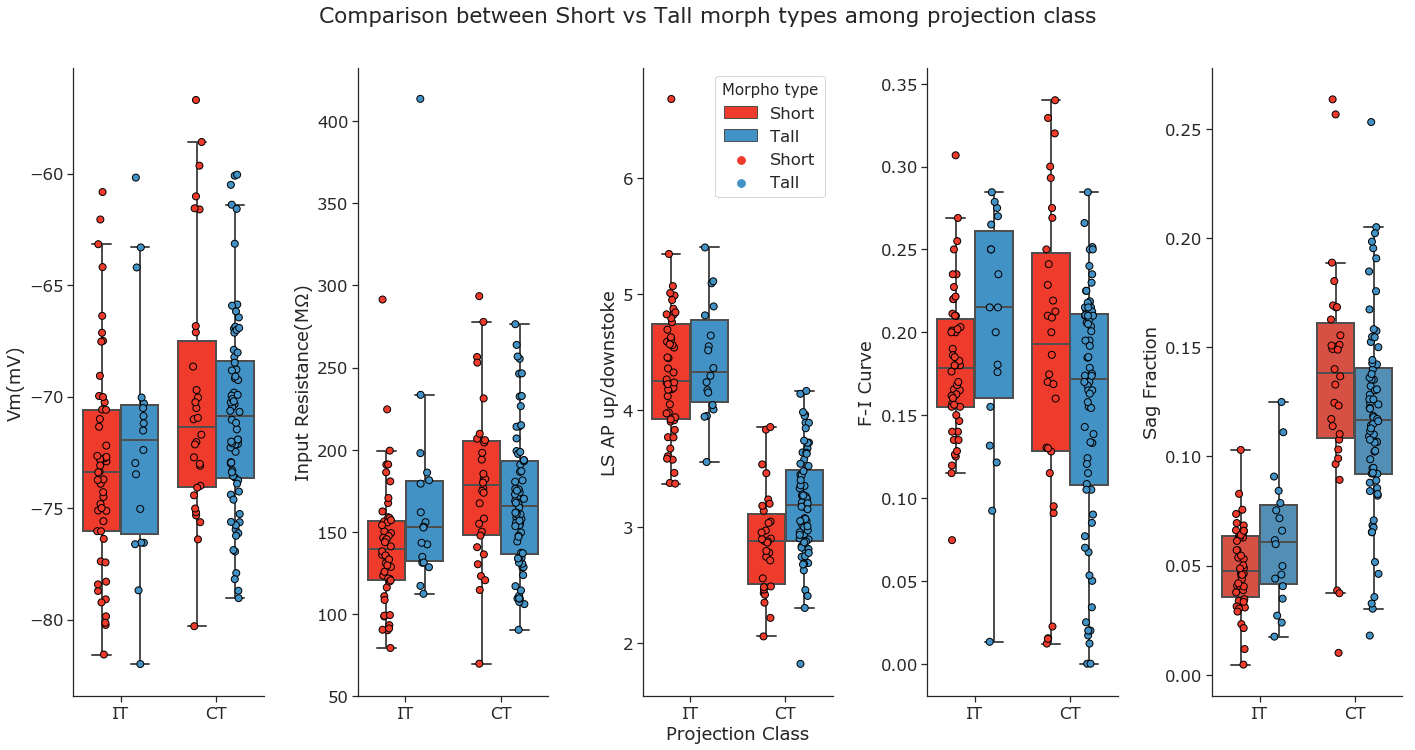

In [167]:
f, axes = plt.subplots(figsize=(20,10), nrows=1, ncols=5, sharex=True)

x="Projection Class"
y0="vrest"
y1="ri"
y2="upstroke_downstroke_ratio_long_square"
y3="f_i_curve_slope"
y4="sag"
hue="Morpho type"

ax0 = sns.boxplot(x=x, y=y0, data=merged, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[0])
ax0 = sns.stripplot(x=x, y=y0, data=merged, hue=hue, hue_order=v_colors, 
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[0])

ax1 = sns.boxplot(x=x, y=y1, data=merged, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[1])
ax1 = sns.stripplot(x=x, y=y1, data=merged, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[1])

ax2 = sns.boxplot(x=x, y=y2, data=merged, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[2])
ax2 = sns.stripplot(x=x, y=y2, data=merged, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[2])

ax3 = sns.boxplot(x=x, y=y3, data=merged, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[3])
ax3 = sns.stripplot(x=x, y=y3, data=merged, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[3])

ax4 = sns.boxplot(x=x, y=y4, data=merged, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[4])
ax4 = sns.stripplot(x=x, y=y4, data=merged, hue=hue, hue_order=v_colors,
                    palette=v_colors, dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[4])


ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Projection Class")
ax3.set_xlabel("")
ax4.set_xlabel("")

ax0.get_legend().remove()
ax1.get_legend().remove()
#ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

ax0.set_ylabel("Vm(mV)")
ax1.set_ylabel("Input Resistance(MΩ)")
ax2.set_ylabel("LS AP up/downstoke")
ax3.set_ylabel("F-I Curve")
ax4.set_ylabel("Sag Fraction")

sns.despine(bottom=False, right=True)
f.tight_layout()
plt.suptitle("Comparison between Short vs Tall morph types among projection class", y=1.05)

##### Ttypes Plot

In [185]:
merged["VISp Tree Mapping"].value_counts()

L6 CT VISp Ctxn3 Brinp3       45
L6 IT VISp Col18a1            41
L6 CT VISp Ctxn3 Sla          33
L6 IT VISp Col23a1 Adamts2    12
L6 IT VISp Penk Col27a1       12
L6 CT VISp Krt80 Sla          12
L6 CT VISp Nxph2 Wls           7
L6 CT VISp Gpr139              5
L6b VISp Mup5                  4
L6 IT VISp Penk Fst            3
L6b Col8a1 Rprm                1
L6b VISp Crh                   1
Name: VISp Tree Mapping, dtype: int64

In [174]:
ttype_list = ["L6 CT VISp Ctxn3 Brinp3", "L6 IT VISp Col18a1", "L6 CT VISp Ctxn3 Sla",
              "L6 IT VISp Col23a1 Adamts2", "L6 IT VISp Penk Col27a1", "L6 CT VISp Krt80 Sla",
              "L6 CT VISp Nxph2 Wls", "L6 CT VISp Gpr139"]

In [175]:
ttypes = merged[merged["VISp Tree Mapping"].isin(ttype_list)]
ttypes.sort_values("VISp Tree Mapping", inplace=True)
len(ttypes)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


167

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

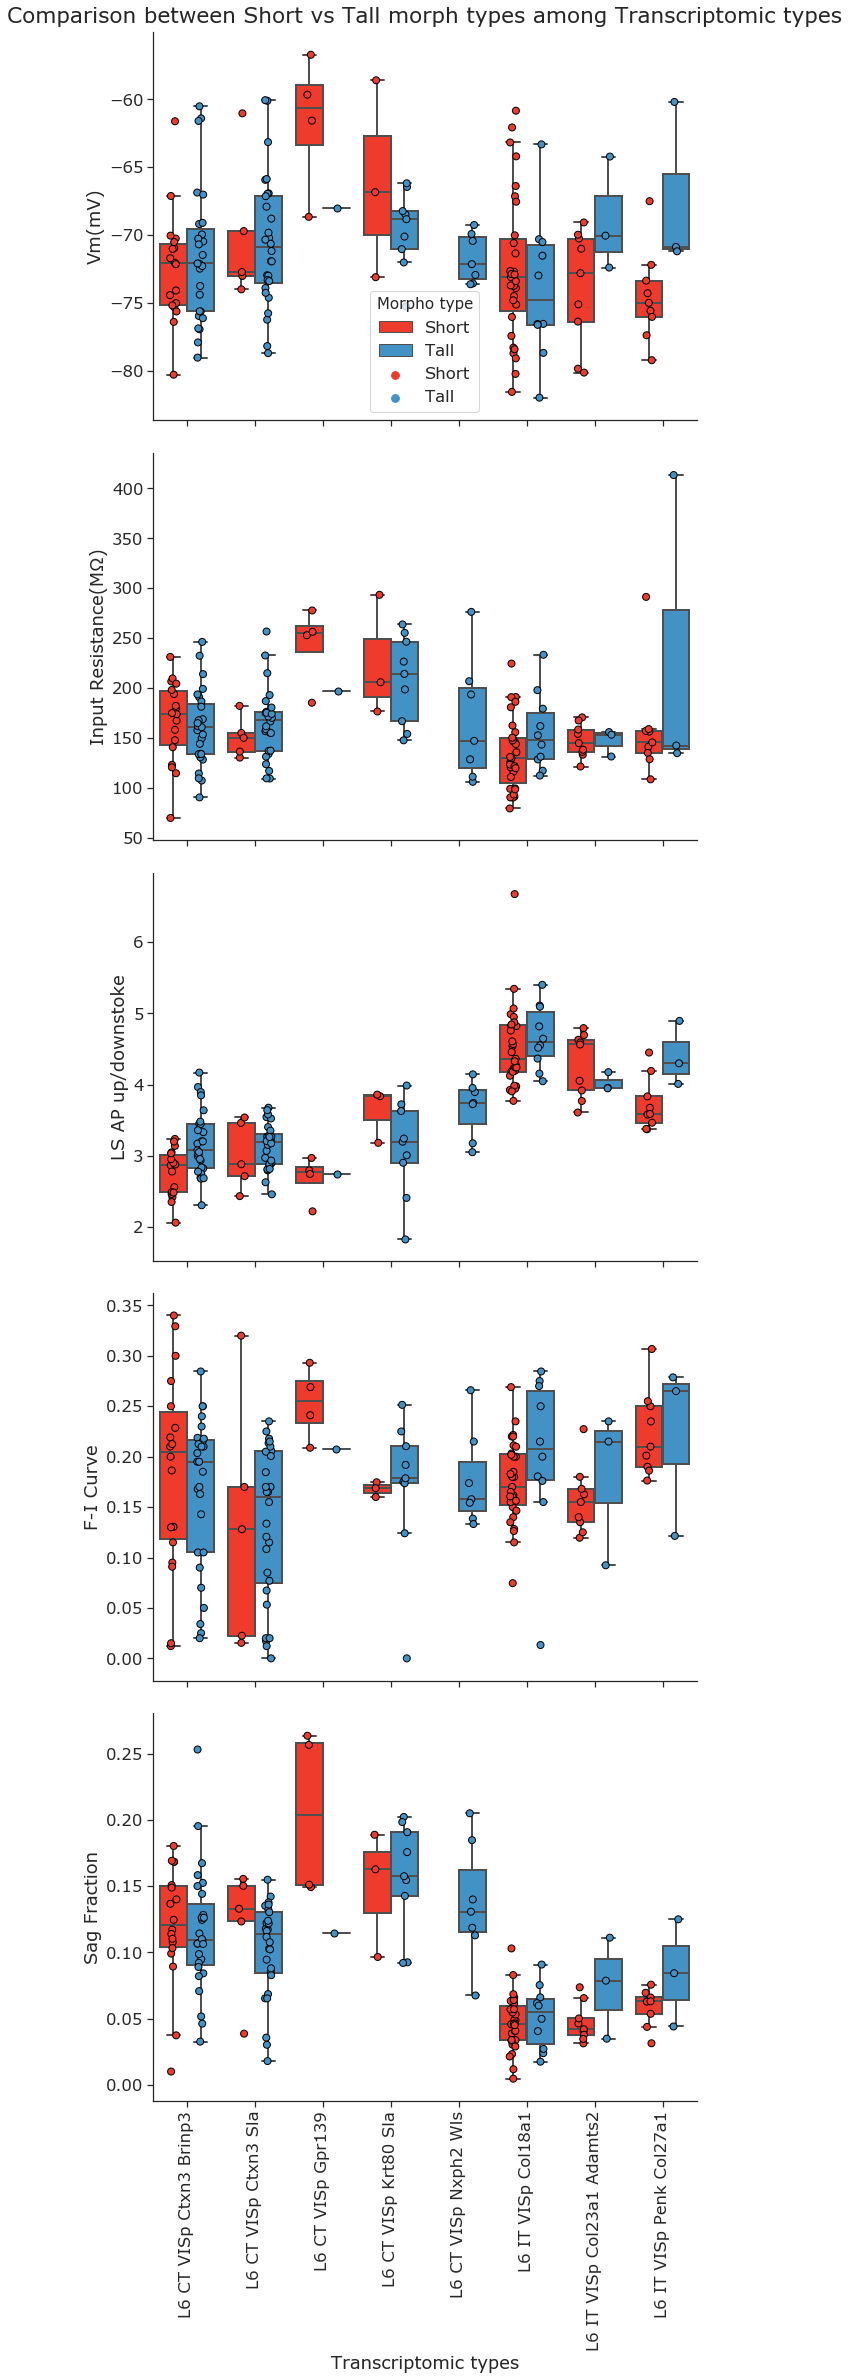

In [184]:
f, axes = plt.subplots(figsize=(10,30), nrows=5, ncols=1, sharex=True)

x="VISp Tree Mapping"
y0="vrest"
y1="ri"
y2="upstroke_downstroke_ratio_long_square"
y3="f_i_curve_slope"
y4="sag"
hue="Morpho type"

ax0 = sns.boxplot(x=x, y=y0, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                  saturation=1, linewidth=2, showfliers=False, ax=axes[0])
ax0 = sns.stripplot(x=x, y=y0, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[0])

ax1 = sns.boxplot(x=x, y=y1, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[1])
ax1 = sns.stripplot(x=x, y=y1, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[1])

ax2 = sns.boxplot(x=x, y=y2, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[2])
ax2 = sns.stripplot(x=x, y=y2, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[2])

ax3 = sns.boxplot(x=x, y=y3, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[3])
ax3 = sns.stripplot(x=x, y=y3, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[3])

ax4 = sns.boxplot(x=x, y=y4, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors,
                  saturation=1, linewidth=2, showfliers=False, ax=axes[4])
ax4 = sns.stripplot(x=x, y=y4, data=ttypes, hue=hue, hue_order=v_colors, palette=v_colors, 
                    dodge=True, size=7, edgecolor="black", linewidth=1, ax=axes[4])


ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("Transcriptomic types")

#ax0.get_legend().remove()
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

ax0.set_ylabel("Vm(mV)")
ax1.set_ylabel("Input Resistance(MΩ)")
ax2.set_ylabel("LS AP up/downstoke")
ax3.set_ylabel("F-I Curve")
ax4.set_ylabel("Sag Fraction")

sns.despine(bottom=False, right=True)
f.tight_layout()
plt.suptitle("Comparison between Short vs Tall morph types among Transcriptomic types", y=1)
plt.xticks(rotation=90)